In [1]:
import numpy as np
import numpy.linalg as lyn
import random
import urllib.request as urlreq
import re
import matplotlib.pyplot as plt
%matplotlib inline
%autosave 180
import Senator as sen

Autosaving every 180 seconds


In [2]:
def mySort(a):
    if(a=='Yea'):
        return 1
    if(a=='Nay'):
        return -1
    return 0

# 107th Data Scrape (2001)
## First, we get the list of actual bills from the senate website
N=Number of Bills for Voting

In [3]:
#Get the Bills Voted On 107th
#Tell senate that Im a person, not Python
headers={}
headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'
#Session #1
url = 'https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_107_1.htm'
req = urlreq.Request(url, headers=headers)
resp = urlreq.urlopen(req)
respData = resp.read()
leader='https://www.senate.gov/l'
listoflinks=[]
data = re.findall(r'<tr(.*?)/tr>',str(respData))
for d in data:
    if("A bill" in d):
        l=re.findall(r'/l(.*?)>',str(d))
        listoflinks.append(leader+str(l)[2:-3])
#How many bills are we working with?
N=len(listoflinks)
print(N)

64


In [4]:
#Trick the Site
#Make my vector of Senator class objects
senators107th = []
nDem=0
nRep=0
nInd=0
#A=np.zeros((100,len(listoflinks)))
baseVote=listoflinks[0] #Get my base senators
req2 = urlreq.Request(baseVote, headers=headers) #Parse the first vote
resp2 = urlreq.urlopen(req2)
respData2 = resp2.read()
data2 = re.findall(r'<span(.*?)/span>',str(respData2))
data2 = data2[11][21:-9]
A=data2.split('/b')
A=A[0:-1]
voteNum=0
for a in A:
    if(a[0]==">"):
        a=a[7:-1]
    else:
        a=a[0:-1]
    d=a.split(' ')
    senators107th.append(sen.Senator(d[0],N,d[1][1]))
    if(d[1][1]=="D"):
        nDem+=1
    elif(d[1][1]=="R"):
        nRep+=1
    else:
        nInd+=1
    for s in senators107th:
        if(s.getName() == d[0]):
            s.setVotes(mySort(d[2][3:]),voteNum)
#Now that we've got the first ones(And the senator Names Loaded,
#Do the rest of the bills
listoflinks = listoflinks[1:]
voteNum+=1
for links in listoflinks:
    url2 = links
    req2 = urlreq.Request(url2, headers=headers) #Parse the first vote
    resp2 = urlreq.urlopen(req2)
    respData2 = resp2.read()
    data2 = re.findall(r'<span(.*?)/span>',str(respData2))
    data2 = data2[11][21:-9]
    A=data2.split('/b')
    A=A[0:-1]
    for a in A:
        if(a[0]==">"):
            a=a[7:-1]
        else:
            a=a[0:-1]
        d=a.split(' ')
        inList = False
        for s in senators107th:
            if(s.getName() == d[0]):
                s.setVotes(mySort(d[2][3:]),voteNum)
                inList = True
        if(not inList):
            senators107th.append(sen.Senator(d[0],N,d[1][1]))
            senators107th[-1].setVotes(mySort(d[2][3:]),voteNum)
            if(d[1][1]=="D"):
                nDem+=1
            elif(d[1][1]=="R"):
                nRep+=1
            else:
                nInd+=1
    voteNum+=1
Votes107th=[]
for s in senators107th:
    Votes107th.append(s.getVotes())
Votes107th=np.asarray(Votes107th)

In [5]:
U,s,V=np.linalg.svd(Votes107th, full_matrices=False)
D=[]
R=[]
I=[]
for i in range(0,U.shape[0]):
    if(senators107th[i].getParty()=="D"):
        f = np.asarray([U[i,1],-U[i,0]])
        D.append(f)
    if(senators107th[i].getParty()=="R"):
        f = np.asarray([U[i,1],-U[i,0]])
        R.append(f)
    if(senators107th[i].getParty()=="I"):
        f = np.asarray([U[i,1],-U[i,0]])
        I.append(f)
D=np.asarray(D)
R=np.asarray(R)
I=np.asarray(I)

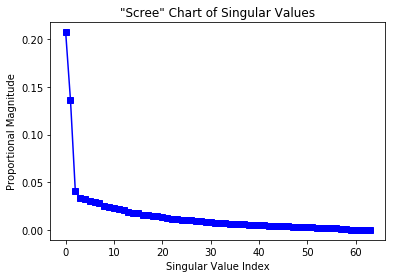

In [6]:
plt.xlabel('Singular Value Index')
plt.ylabel('Proportional Magnitude')
plt.title('"Scree" Chart of Singular Values')
plt.plot(s/s.sum(), c='b', marker="s");
plt.savefig('votescree.png')

There are 50 Democrats
There are 49 Republicans
There is/are 1 Independents


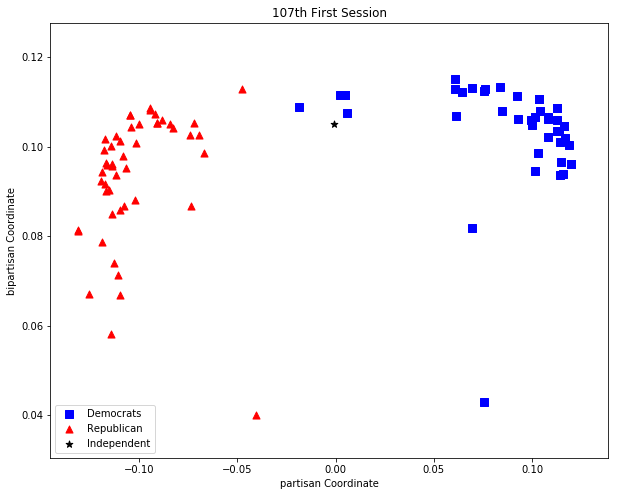

In [7]:
print("There are", D.shape[0], "Democrats")
print("There are", R.shape[0], "Republicans")
print("There is/are", I.shape[0], "Independents")
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
plt.xlabel('partisan Coordinate')
plt.ylabel('bipartisan Coordinate')
plt.title('107th First Session')
ax1.scatter(D[:,0], D[:,1], s=50, c='b', marker="s", label='Democrats')
ax1.scatter(R[:,0], R[:,1], s=50, c='r', marker="^", label='Republican')
ax1.scatter(I[:,0], I[:,1], s=50, c='k', marker="*", label='Independent')
plt.legend(loc='lower left');
plt.savefig('107th1.png')
plt.show()


# Lets now consider the second Session

In [8]:
#Session 2
url = 'https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_107_2.htm'
req = urlreq.Request(url, headers=headers)
resp = urlreq.urlopen(req)
respData = resp.read()
leader='https://www.senate.gov/l'
listoflinks=[]
data = re.findall(r'<tr(.*?)/tr>',str(respData))
for d in data:
    if("A bill" in d):
        l=re.findall(r'/l(.*?)>',str(d))
        listoflinks.append(leader+str(l)[2:-3])
N=len(listoflinks)
print(N)

44


In [9]:
#Trick the Site
#Make my vector of Senator class objects
senators107th = []
nDem=0
nRep=0
nInd=0
#A=np.zeros((100,len(listoflinks)))
baseVote=listoflinks[0] #Get my base senators
req2 = urlreq.Request(baseVote, headers=headers) #Parse the first vote
resp2 = urlreq.urlopen(req2)
respData2 = resp2.read()
data2 = re.findall(r'<span(.*?)/span>',str(respData2))
data2 = data2[11][21:-9]
A=data2.split('/b')
A=A[0:-1]
voteNum=0
for a in A:
    if(a[0]==">"):
        a=a[7:-1]
    else:
        a=a[0:-1]
    d=a.split(' ')
    senators107th.append(sen.Senator(d[0],N,d[1][1]))
    if(d[1][1]=="D"):
        nDem+=1
    elif(d[1][1]=="R"):
        nRep+=1
    else:
        nInd+=1
    for s in senators107th:
        if(s.getName() == d[0]):
            s.setVotes(mySort(d[2][3:]),voteNum)
#Now that we've got the first ones(And the senator Names Loaded,
#Do the rest of the bills
listoflinks = listoflinks[1:]
voteNum+=1
for links in listoflinks:
    url2 = links
    req2 = urlreq.Request(url2, headers=headers) #Parse the first vote
    resp2 = urlreq.urlopen(req2)
    respData2 = resp2.read()
    data2 = re.findall(r'<span(.*?)/span>',str(respData2))
    data2 = data2[11][21:-9]
    A=data2.split('/b')
    A=A[0:-1]
    for a in A:
        if(a[0]==">"):
            a=a[7:-1]
        else:
            a=a[0:-1]
        d=a.split(' ')
        inList = False
        for s in senators107th:
            if(s.getName() == d[0]):
                s.setVotes(mySort(d[2][3:]),voteNum)
                inList = True
        if(not inList):
            senators107th.append(sen.Senator(d[0],N,d[1][1]))
            senators107th[-1].setVotes(mySort(d[2][3:]),voteNum)
            if(d[1][1]=="D"):
                nDem+=1
            elif(d[1][1]=="R"):
                nRep+=1
            else:
                nInd+=1
    voteNum+=1
Votes107th=[]
for s in senators107th:
    Votes107th.append(s.getVotes())
Votes107th=np.asarray(Votes107th)

In [10]:
U,s,V=np.linalg.svd(Votes107th, full_matrices=False)
D=[]
R=[]
I=[]
for i in range(0,U.shape[0]):
    if(senators107th[i].getParty()=="D"):
        f = np.asarray([-U[i,1],-U[i,0]])
        D.append(f)
    if(senators107th[i].getParty()=="R"):
        f = np.asarray([-U[i,1],-U[i,0]])
        R.append(f)
    if(senators107th[i].getParty()=="I"):
        f = np.asarray([-U[i,1],-U[i,0]])
        I.append(f)
D=np.asarray(D)
R=np.asarray(R)
I=np.asarray(I)

There are 50 Democrats
There are 49 Republicans
There is/are 2 Independents


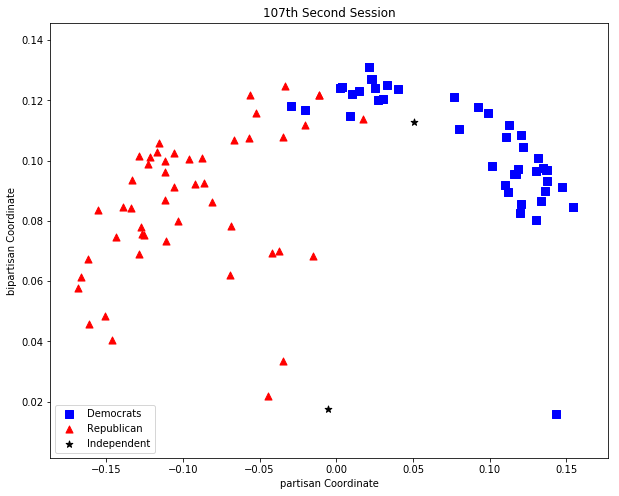

In [11]:
print("There are", D.shape[0], "Democrats")
print("There are", R.shape[0], "Republicans")
print("There is/are", I.shape[0], "Independents")
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
plt.xlabel('partisan Coordinate')
plt.ylabel('bipartisan Coordinate')
plt.title('107th Second Session')
ax1.scatter(D[:,0], D[:,1], s=50, c='b', marker="s", label='Democrats')
ax1.scatter(R[:,0], R[:,1], s=50, c='r', marker="^", label='Republican')
ax1.scatter(I[:,0], I[:,1], s=50, c='k', marker="*", label='Independent')
plt.legend(loc='lower left');
plt.savefig('107th2.png')
plt.show()

# 101st Data Scrape (1989)
## First, we get the list of actual bills from the senate website
N=Number of Bills for Voting

In [12]:
#Get the Bills Voted On 107th
#Tell senate that Im a person, not Python
headers={}
headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'
#Session #1
url = 'https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_101_1.htm'
req = urlreq.Request(url, headers=headers)
resp = urlreq.urlopen(req)
respData = resp.read()
leader='https://www.senate.gov/l'
listoflinks=[]
data = re.findall(r'<tr(.*?)/tr>',str(respData))
for d in data:
    if("A bill" in d):
        l=re.findall(r'/l(.*?)>',str(d))
        listoflinks.append(leader+str(l)[2:-3])
#How many bills are we working with?
N=len(listoflinks)
print(N)

51


In [13]:
#Trick the Site
#Make my vector of Senator class objects
senators101th = []
nDem=0
nRep=0
nInd=0
#A=np.zeros((100,len(listoflinks)))
baseVote=listoflinks[0] #Get my base senators
req2 = urlreq.Request(baseVote, headers=headers) #Parse the first vote
resp2 = urlreq.urlopen(req2)
respData2 = resp2.read()
data2 = re.findall(r'<span(.*?)/span>',str(respData2))
data2 = data2[11][21:-9]
A=data2.split('/b')
A=A[0:-1]
voteNum=0
for a in A:
    if(a[0]==">"):
        a=a[7:-1]
    else:
        a=a[0:-1]
    d=a.split(' ')
    senators101th.append(sen.Senator(d[0],N,d[1][1]))
    if(d[1][1]=="D"):
        nDem+=1
    elif(d[1][1]=="R"):
        nRep+=1
    else:
        nInd+=1
    for s in senators101th:
        if(s.getName() == d[0]):
            s.setVotes(mySort(d[2][3:]),voteNum)
#Now that we've got the first ones(And the senator Names Loaded,
#Do the rest of the bills
listoflinks = listoflinks[1:]
voteNum+=1
for links in listoflinks:
    url2 = links
    req2 = urlreq.Request(url2, headers=headers) #Parse the first vote
    resp2 = urlreq.urlopen(req2)
    respData2 = resp2.read()
    data2 = re.findall(r'<span(.*?)/span>',str(respData2))
    data2 = data2[11][21:-9]
    A=data2.split('/b')
    A=A[0:-1]
    for a in A:
        if(a[0]==">"):
            a=a[7:-1]
        else:
            a=a[0:-1]
        d=a.split(' ')
        inList = False
        for s in senators101th:
            if(s.getName() == d[0]):
                s.setVotes(mySort(d[2][3:]),voteNum)
                inList = True
        if(not inList):
            senators101th.append(sen.Senator(d[0],N,d[1][1]))
            senators101th[-1].setVotes(mySort(d[2][3:]),voteNum)
            if(d[1][1]=="D"):
                nDem+=1
            elif(d[1][1]=="R"):
                nRep+=1
            else:
                nInd+=1
    voteNum+=1
Votes101th=[]
for s in senators101th:
    Votes101th.append(s.getVotes())
Votes101th=np.asarray(Votes101th)

In [14]:
U,s,V=np.linalg.svd(Votes101th, full_matrices=False)
D=[]
R=[]
I=[]
for i in range(0,U.shape[0]):
    if(senators101th[i].getParty()=="D"):
        f = np.asarray([-U[i,1],-U[i,0]])
        D.append(f)
    if(senators101th[i].getParty()=="R"):
        f = np.asarray([-U[i,1],-U[i,0]])
        R.append(f)
    if(senators101th[i].getParty()=="I"):
        f = np.asarray([-U[i,1],-U[i,0]])
        I.append(f)
D=np.asarray(D)
R=np.asarray(R)
I=np.asarray(I)

There are 55 Democrats
There are 45 Republicans
There is/are 0 Independents


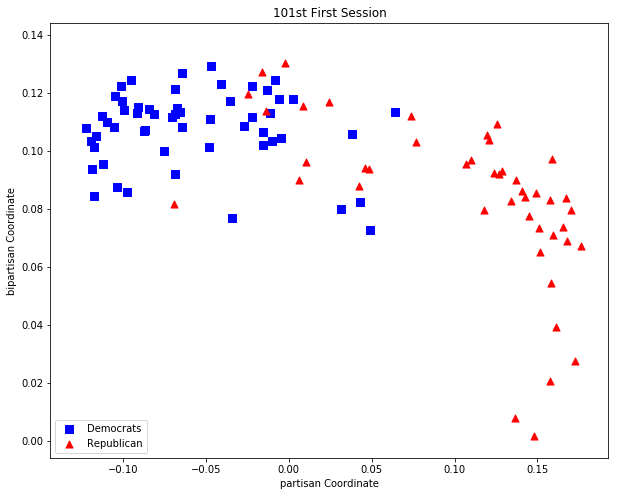

In [15]:
print("There are", D.shape[0], "Democrats")
print("There are", R.shape[0], "Republicans")
print("There is/are", I.shape[0], "Independents")
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
plt.xlabel('partisan Coordinate')
plt.ylabel('bipartisan Coordinate')
plt.title('101st First Session')
ax1.scatter(D[:,0], D[:,1], s=50, c='b', marker="s", label='Democrats')
ax1.scatter(R[:,0], R[:,1], s=50, c='r', marker="^", label='Republican')
if(I.shape[0]!=0):
    ax1.scatter(I[:,0], I[:,1], s=50, c='k', marker="*", label='Independent')
plt.legend(loc='lower left');
plt.savefig('101st1.png')
plt.show()


# Lets now consider the second Session

In [16]:
#Session 2
url = 'https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_101_2.htm'
req = urlreq.Request(url, headers=headers)
resp = urlreq.urlopen(req)
respData = resp.read()
leader='https://www.senate.gov/l'
listoflinks=[]
data = re.findall(r'<tr(.*?)/tr>',str(respData))
for d in data:
    if("A bill" in d):
        l=re.findall(r'/l(.*?)>',str(d))
        listoflinks.append(leader+str(l)[2:-3])
N=len(listoflinks)
print(N)

62


In [17]:
#Trick the Site
#Make my vector of Senator class objects
senators101th = []
nDem=0
nRep=0
nInd=0
#A=np.zeros((100,len(listoflinks)))
baseVote=listoflinks[0] #Get my base senators
req2 = urlreq.Request(baseVote, headers=headers) #Parse the first vote
resp2 = urlreq.urlopen(req2)
respData2 = resp2.read()
data2 = re.findall(r'<span(.*?)/span>',str(respData2))
data2 = data2[11][21:-9]
A=data2.split('/b')
A=A[0:-1]
voteNum=0
for a in A:
    if(a[0]==">"):
        a=a[7:-1]
    else:
        a=a[0:-1]
    d=a.split(' ')
    senators101th.append(sen.Senator(d[0],N,d[1][1]))
    if(d[1][1]=="D"):
        nDem+=1
    elif(d[1][1]=="R"):
        nRep+=1
    else:
        nInd+=1
    for s in senators101th:
        if(s.getName() == d[0]):
            s.setVotes(mySort(d[2][3:]),voteNum)
#Now that we've got the first ones(And the senator Names Loaded,
#Do the rest of the bills
listoflinks = listoflinks[1:]
voteNum+=1
for links in listoflinks:
    url2 = links
    req2 = urlreq.Request(url2, headers=headers) #Parse the first vote
    resp2 = urlreq.urlopen(req2)
    respData2 = resp2.read()
    data2 = re.findall(r'<span(.*?)/span>',str(respData2))
    data2 = data2[11][21:-9]
    A=data2.split('/b')
    A=A[0:-1]
    for a in A:
        if(a[0]==">"):
            a=a[7:-1]
        else:
            a=a[0:-1]
        d=a.split(' ')
        inList = False
        for s in senators101th:
            if(s.getName() == d[0]):
                s.setVotes(mySort(d[2][3:]),voteNum)
                inList = True
        if(not inList):
            senators101th.append(sen.Senator(d[0],N,d[1][1]))
            senators101th[-1].setVotes(mySort(d[2][3:]),voteNum)
            if(d[1][1]=="D"):
                nDem+=1
            elif(d[1][1]=="R"):
                nRep+=1
            else:
                nInd+=1
    voteNum+=1
Votes101th=[]
for s in senators101th:
    Votes101th.append(s.getVotes())
Votes101th=np.asarray(Votes101th)

In [18]:
U,s,V=np.linalg.svd(Votes101th, full_matrices=False)
D=[]
R=[]
I=[]
for i in range(0,U.shape[0]):
    if(senators101th[i].getParty()=="D"):
        f = np.asarray([U[i,1],-U[i,0]])
        D.append(f)
    if(senators101th[i].getParty()=="R"):
        f = np.asarray([U[i,1],-U[i,0]])
        R.append(f)
    if(senators101th[i].getParty()=="I"):
        f = np.asarray([U[i,1],-U[i,0]])
        I.append(f)
D=np.asarray(D)
R=np.asarray(R)
I=np.asarray(I)

There are 56 Democrats
There are 45 Republicans
There is/are 0 Independents


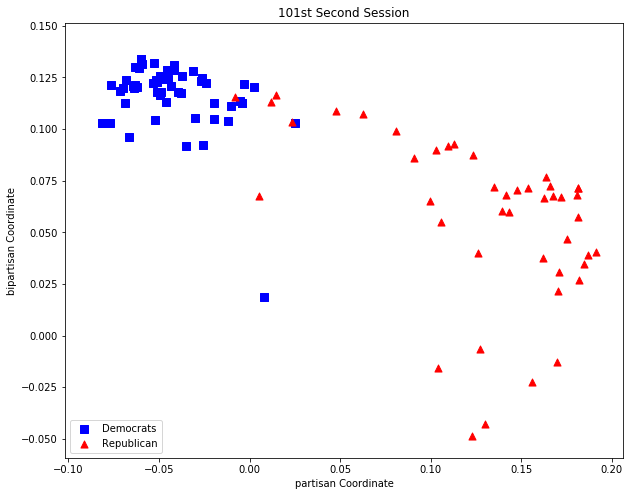

In [19]:
print("There are", D.shape[0], "Democrats")
print("There are", R.shape[0], "Republicans")
print("There is/are", I.shape[0], "Independents")
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
plt.xlabel('partisan Coordinate')
plt.ylabel('bipartisan Coordinate')
plt.title('101st Second Session')
ax1.scatter(D[:,0], D[:,1], s=50, c='b', marker="s", label='Democrats')
ax1.scatter(R[:,0], R[:,1], s=50, c='r', marker="^", label='Republican')
if(I.shape[0]!=0):
    ax1.scatter(I[:,0], I[:,1], s=50, c='k', marker="*", label='Independent')
plt.legend(loc='lower left');
plt.savefig('101st2.png')
plt.show()


# 104th Data Scrape (1995)
## First, we get the list of actual bills from the senate website
N=Number of Bills for Voting

In [20]:
#Get the Bills Voted On 107th
#Tell senate that Im a person, not Python
headers={}
headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'
#Session #1
url = 'https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_104_1.htm'
req = urlreq.Request(url, headers=headers)
resp = urlreq.urlopen(req)
respData = resp.read()
leader='https://www.senate.gov/l'
listoflinks=[]
data = re.findall(r'<tr(.*?)/tr>',str(respData))
for d in data:
    if("A bill" in d):
        l=re.findall(r'/l(.*?)>',str(d))
        listoflinks.append(leader+str(l)[2:-3])
#How many bills are we working with?
N=len(listoflinks)
print(N)

81


In [21]:
#Trick the Site
#Make my vector of Senator class objects
senators104th = []
nDem=0
nRep=0
nInd=0
#A=np.zeros((100,len(listoflinks)))
baseVote=listoflinks[0] #Get my base senators
req2 = urlreq.Request(baseVote, headers=headers) #Parse the first vote
resp2 = urlreq.urlopen(req2)
respData2 = resp2.read()
data2 = re.findall(r'<span(.*?)/span>',str(respData2))
data2 = data2[11][21:-9]
A=data2.split('/b')
A=A[0:-1]
voteNum=0
for a in A:
    if(a[0]==">"):
        a=a[7:-1]
    else:
        a=a[0:-1]
    d=a.split(' ')
    senators104th.append(sen.Senator(d[0],N,d[1][1]))
    if(d[1][1]=="D"):
        nDem+=1
    elif(d[1][1]=="R"):
        nRep+=1
    else:
        nInd+=1
    for s in senators104th:
        if(s.getName() == d[0]):
            s.setVotes(mySort(d[2][3:]),voteNum)
#Now that we've got the first ones(And the senator Names Loaded,
#Do the rest of the bills
listoflinks = listoflinks[1:]
voteNum+=1
for links in listoflinks:
    url2 = links
    req2 = urlreq.Request(url2, headers=headers) #Parse the first vote
    resp2 = urlreq.urlopen(req2)
    respData2 = resp2.read()
    data2 = re.findall(r'<span(.*?)/span>',str(respData2))
    data2 = data2[11][21:-9]
    A=data2.split('/b')
    A=A[0:-1]
    for a in A:
        if(a[0]==">"):
            a=a[7:-1]
        else:
            a=a[0:-1]
        d=a.split(' ')
        inList = False
        for s in senators104th:
            if(s.getName() == d[0]):
                s.setVotes(mySort(d[2][3:]),voteNum)
                inList = True
        if(not inList):
            senators104th.append(sen.Senator(d[0],N,d[1][1]))
            senators104th[-1].setVotes(mySort(d[2][3:]),voteNum)
            if(d[1][1]=="D"):
                nDem+=1
            elif(d[1][1]=="R"):
                nRep+=1
            else:
                nInd+=1
    voteNum+=1
Votes104th=[]
for s in senators104th:
    Votes104th.append(s.getVotes())
Votes104th=np.asarray(Votes104th)

In [22]:
U,s,V=np.linalg.svd(Votes104th, full_matrices=False)
D=[]
R=[]
I=[]
for i in range(0,U.shape[0]):
    if(senators104th[i].getParty()=="D"):
        f = np.asarray([-U[i,1],-U[i,0]])
        D.append(f)
    if(senators104th[i].getParty()=="R"):
        f = np.asarray([-U[i,1],-U[i,0]])
        R.append(f)
    if(senators104th[i].getParty()=="I"):
        f = np.asarray([-U[i,1],-U[i,0]])
        I.append(f)
D=np.asarray(D)
R=np.asarray(R)
I=np.asarray(I)

In [23]:
len(senators104th)

100

In [24]:
U.shape

(100, 81)

There are 46 Democrats
There are 54 Republicans
There is/are 0 Independents


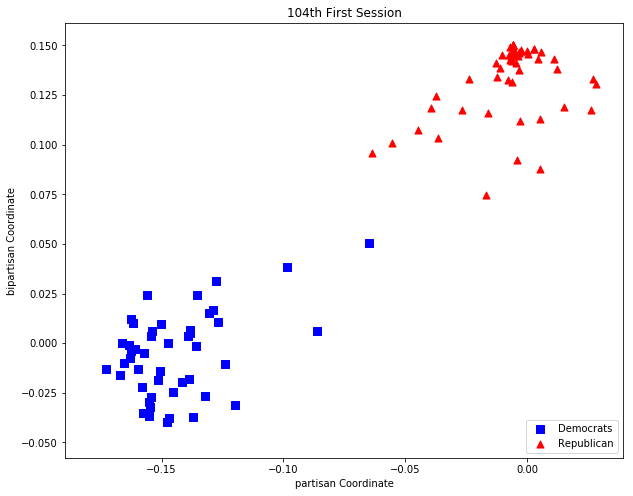

In [25]:
print("There are", D.shape[0], "Democrats")
print("There are", R.shape[0], "Republicans")
print("There is/are", I.shape[0], "Independents")
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
plt.xlabel('partisan Coordinate')
plt.ylabel('bipartisan Coordinate')
plt.title('104th First Session')
ax1.scatter(D[:,0], D[:,1], s=50, c='b', marker="s", label='Democrats')
ax1.scatter(R[:,0], R[:,1], s=50, c='r', marker="^", label='Republican')
if(I.shape[0]!=0):
    ax1.scatter(I[:,0], I[:,1], s=50, c='k', marker="*", label='Independent')
plt.legend(loc='lower right');
plt.savefig('104th1.png')
plt.show()


# Second Session 104th

In [26]:
#Get the Bills Voted On 107th
#Tell senate that Im a person, not Python
headers={}
headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'
#Session #1
url = 'https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_104_2.htm'
req = urlreq.Request(url, headers=headers)
resp = urlreq.urlopen(req)
respData = resp.read()
leader='https://www.senate.gov/l'
listoflinks=[]
data = re.findall(r'<tr(.*?)/tr>',str(respData))
for d in data:
    if("A bill" in d):
        l=re.findall(r'/l(.*?)>',str(d))
        listoflinks.append(leader+str(l)[2:-3])
#How many bills are we working with?
N=len(listoflinks)
print(N)

68


In [27]:
#Trick the Site
#Make my vector of Senator class objects
senators104th = []
nDem=0
nRep=0
nInd=0
#A=np.zeros((100,len(listoflinks)))
baseVote=listoflinks[0] #Get my base senators
req2 = urlreq.Request(baseVote, headers=headers) #Parse the first vote
resp2 = urlreq.urlopen(req2)
respData2 = resp2.read()
data2 = re.findall(r'<span(.*?)/span>',str(respData2))
data2 = data2[11][21:-9]
A=data2.split('/b')
A=A[0:-1]
voteNum=0
for a in A:
    if(a[0]==">"):
        a=a[7:-1]
    else:
        a=a[0:-1]
    d=a.split(' ')
    senators104th.append(sen.Senator(d[0],N,d[1][1]))
    if(d[1][1]=="D"):
        nDem+=1
    elif(d[1][1]=="R"):
        nRep+=1
    else:
        nInd+=1
    for s in senators104th:
        if(s.getName() == d[0]):
            s.setVotes(mySort(d[2][3:]),voteNum)
#Now that we've got the first ones(And the senator Names Loaded,
#Do the rest of the bills
listoflinks = listoflinks[1:]
voteNum+=1
for links in listoflinks:
    url2 = links
    req2 = urlreq.Request(url2, headers=headers) #Parse the first vote
    resp2 = urlreq.urlopen(req2)
    respData2 = resp2.read()
    data2 = re.findall(r'<span(.*?)/span>',str(respData2))
    data2 = data2[11][21:-9]
    A=data2.split('/b')
    A=A[0:-1]
    for a in A:
        if(a[0]==">"):
            a=a[7:-1]
        else:
            a=a[0:-1]
        d=a.split(' ')
        inList = False
        for s in senators104th:
            if(s.getName() == d[0]):
                s.setVotes(mySort(d[2][3:]),voteNum)
                inList = True
        if(not inList):
            senators104th.append(sen.Senator(d[0],N,d[1][1]))
            senators104th[-1].setVotes(mySort(d[2][3:]),voteNum)
            if(d[1][1]=="D"):
                nDem+=1
            elif(d[1][1]=="R"):
                nRep+=1
            else:
                nInd+=1
    voteNum+=1
Votes104th=[]
for s in senators104th:
    Votes104th.append(s.getVotes())
Votes104th=np.asarray(Votes104th)

In [28]:
U,s,V=np.linalg.svd(Votes104th, full_matrices=False)
D=[]
R=[]
I=[]
for i in range(0,U.shape[0]):
    if(senators104th[i].getParty()=="D"):
        f = np.asarray([-U[i,1],-U[i,0]])
        D.append(f)
    if(senators104th[i].getParty()=="R"):
        f = np.asarray([-U[i,1],-U[i,0]])
        R.append(f)
    if(senators104th[i].getParty()=="I"):
        f = np.asarray([-U[i,1],-U[i,0]])
        I.append(f)
D=np.asarray(D)
R=np.asarray(R)
I=np.asarray(I)

In [29]:
len(senators104th)

101

In [30]:
U.shape

(101, 68)

There are 47 Democrats
There are 54 Republicans
There is/are 0 Independents


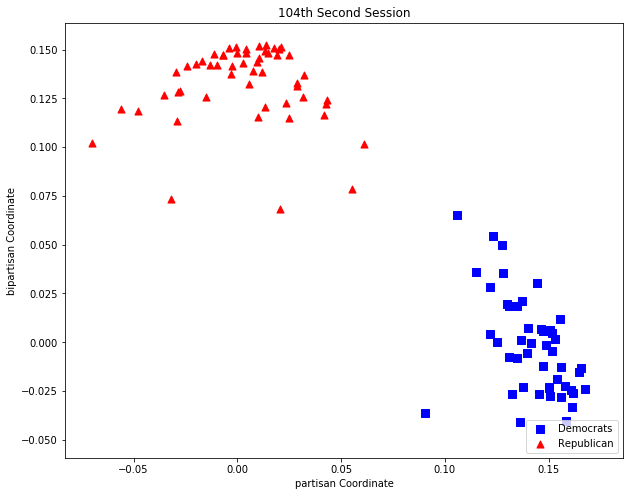

In [31]:
print("There are", D.shape[0], "Democrats")
print("There are", R.shape[0], "Republicans")
print("There is/are", I.shape[0], "Independents")
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
plt.xlabel('partisan Coordinate')
plt.ylabel('bipartisan Coordinate')
plt.title('104th Second Session')
ax1.scatter(D[:,0], D[:,1], s=50, c='b', marker="s", label='Democrats')
ax1.scatter(R[:,0], R[:,1], s=50, c='r', marker="^", label='Republican')
if(I.shape[0]!=0):
    ax1.scatter(I[:,0], I[:,1], s=50, c='k', marker="*", label='Independent')
plt.legend(loc='lower right');
plt.savefig('104th2.png')
plt.show()


# 110th Data Scrape (2007)
## First, we get the list of actual bills from the senate website
N=Number of Bills for Voting

In [32]:
#Get the Bills Voted On 110th
#Tell senate that Im a person, not Python
headers={}
headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'
#Session #1
url = 'https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_110_1.htm'
req = urlreq.Request(url, headers=headers)
resp = urlreq.urlopen(req)
respData = resp.read()
leader='https://www.senate.gov/l'
listoflinks=[]
data = re.findall(r'<tr(.*?)/tr>',str(respData))
for d in data:
    if("A bill" in d):
        l=re.findall(r'/l(.*?)>',str(d))
        listoflinks.append(leader+str(l)[2:-3])
#How many bills are we working with?
N=len(listoflinks)
print(N)

74


In [33]:
#Trick the Site
#Make my vector of Senator class objects
senators110th = []
nDem=0
nRep=0
nInd=0
#A=np.zeros((100,len(listoflinks)))
baseVote=listoflinks[0] #Get my base senators
req2 = urlreq.Request(baseVote, headers=headers) #Parse the first vote
resp2 = urlreq.urlopen(req2)
respData2 = resp2.read()
data2 = re.findall(r'<span(.*?)/span>',str(respData2))
data2 = data2[11][21:-9]
A=data2.split('/b')
A=A[0:-1]
voteNum=0
for a in A:
    if(a[0]==">"):
        a=a[15:-1]
    else:
        a=a[0:-1]
    d=a.split(' ')
    senators110th.append(sen.Senator(d[0],N,d[1][1]))
    if(d[1][1]=="D"):
        nDem+=1
    elif(d[1][1]=="R"):
        nRep+=1
    else:
        nInd+=1
    for s in senators110th:
        if(s.getName() == d[0]):
            s.setVotes(mySort(d[2][3:]),voteNum)
#Now that we've got the first ones(And the senator Names Loaded,
#Do the rest of the bills
listoflinks = listoflinks[1:]
voteNum+=1
for links in listoflinks:
    url2 = links
    req2 = urlreq.Request(url2, headers=headers) #Parse the first vote
    resp2 = urlreq.urlopen(req2)
    respData2 = resp2.read()
    data2 = re.findall(r'<span(.*?)/span>',str(respData2))
    data2 = data2[11][21:-9]
    A=data2.split('/b')
    A=A[0:-1]
    for a in A:
        if(a[0]==">"):
            a=a[15:-1]
        else:
            a=a[0:-1]
        d=a.split(' ')
        inList = False
        for s in senators110th:
            if(s.getName() == d[0]):
                s.setVotes(mySort(d[2][3:]),voteNum)
                inList = True
        if(not inList):
            senators110th.append(sen.Senator(d[0],N,d[1][1]))
            senators110th[-1].setVotes(mySort(d[2][3:]),voteNum)
            if(d[1][1]=="D"):
                nDem+=1
            elif(d[1][1]=="R"):
                nRep+=1
            else:
                nInd+=1
    voteNum+=1
Votes110th=[]
for s in senators110th:
    Votes110th.append(s.getVotes())
Votes110th=np.asarray(Votes110th)

In [34]:
U,s,V=np.linalg.svd(Votes110th, full_matrices=False)
D=[]
R=[]
I=[]
for i in range(0,U.shape[0]):
    if(senators110th[i].getParty()=="D"):
        f = np.asarray([-U[i,1],-U[i,0]])
        D.append(f)
    if(senators110th[i].getParty()=="R"):
        f = np.asarray([-U[i,1],-U[i,0]])
        R.append(f)
    if(senators110th[i].getParty()=="I"):
        f = np.asarray([-U[i,1],-U[i,0]])
        I.append(f)
D=np.asarray(D)
R=np.asarray(R)
I=np.asarray(I)

In [35]:
len(senators104th)

101

In [36]:
U.shape

(101, 74)

There are 49 Democrats
There are 50 Republicans
There is/are 2 Independents


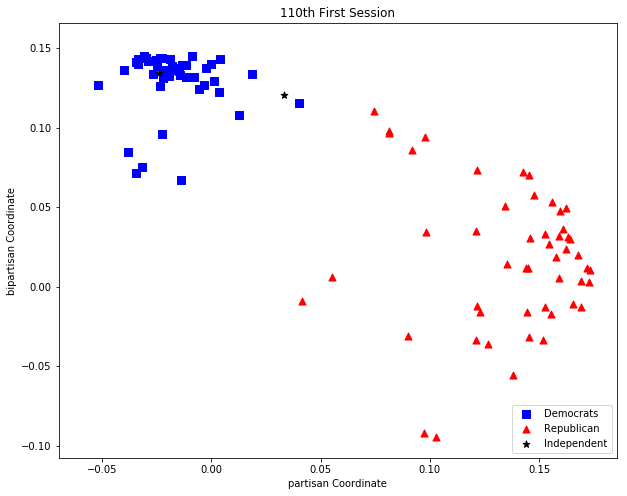

In [37]:
print("There are", D.shape[0], "Democrats")
print("There are", R.shape[0], "Republicans")
print("There is/are", I.shape[0], "Independents")
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
plt.xlabel('partisan Coordinate')
plt.ylabel('bipartisan Coordinate')
plt.title('110th First Session')
ax1.scatter(D[:,0], D[:,1], s=50, c='b', marker="s", label='Democrats')
ax1.scatter(R[:,0], R[:,1], s=50, c='r', marker="^", label='Republican')
if(I.shape[0]!=0):
    ax1.scatter(I[:,0], I[:,1], s=50, c='k', marker="*", label='Independent')
plt.legend(loc='lower right');
plt.savefig('110th1.png')
plt.show()


# Second Session 110th

In [38]:
#Get the Bills Voted On 107th
#Tell senate that Im a person, not Python
headers={}
headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'
#Session #1
url = 'https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_110_2.htm'
req = urlreq.Request(url, headers=headers)
resp = urlreq.urlopen(req)
respData = resp.read()
leader='https://www.senate.gov/l'
listoflinks=[]
data = re.findall(r'<tr(.*?)/tr>',str(respData))
for d in data:
    if("A bill" in d):
        l=re.findall(r'/l(.*?)>',str(d))
        listoflinks.append(leader+str(l)[2:-3])
#How many bills are we working with?
N=len(listoflinks)
print(N)

73


In [39]:
#Trick the Site
#Make my vector of Senator class objects
senators110th = []
nDem=0
nRep=0
nInd=0
#A=np.zeros((100,len(listoflinks)))
baseVote=listoflinks[0] #Get my base senators
req2 = urlreq.Request(baseVote, headers=headers) #Parse the first vote
resp2 = urlreq.urlopen(req2)
respData2 = resp2.read()
data2 = re.findall(r'<span(.*?)/span>',str(respData2))
data2 = data2[11][21:-9]
A=data2.split('/b')
A=A[0:-1]
voteNum=0
for a in A:
    if(a[0]==">"):
        a=a[15:-1]
    else:
        a=a[0:-1]
    d=a.split(' ')
    senators110th.append(sen.Senator(d[0],N,d[1][1]))
    if(d[1][1]=="D"):
        nDem+=1
    elif(d[1][1]=="R"):
        nRep+=1
    else:
        nInd+=1
    for s in senators110th:
        if(s.getName() == d[0]):
            s.setVotes(mySort(d[2][3:]),voteNum)
#Now that we've got the first ones(And the senator Names Loaded,
#Do the rest of the bills
listoflinks = listoflinks[1:]
voteNum+=1
for links in listoflinks:
    url2 = links
    req2 = urlreq.Request(url2, headers=headers) #Parse the first vote
    resp2 = urlreq.urlopen(req2)
    respData2 = resp2.read()
    data2 = re.findall(r'<span(.*?)/span>',str(respData2))
    data2 = data2[11][21:-9]
    A=data2.split('/b')
    A=A[0:-1]
    for a in A:
        if(a[0]==">"):
            a=a[15:-1]
        else:
            a=a[0:-1]
        d=a.split(' ')
        inList = False
        for s in senators110th:
            if(s.getName() == d[0]):
                s.setVotes(mySort(d[2][3:]),voteNum)
                inList = True
        if(not inList):
            senators110th.append(sen.Senator(d[0],N,d[1][1]))
            senators110th[-1].setVotes(mySort(d[2][3:]),voteNum)
            if(d[1][1]=="D"):
                nDem+=1
            elif(d[1][1]=="R"):
                nRep+=1
            else:
                nInd+=1
    voteNum+=1
Votes110th=[]
for s in senators110th:
    Votes110th.append(s.getVotes())
Votes110th=np.asarray(Votes110th)

In [40]:
U,s,V=np.linalg.svd(Votes110th, full_matrices=False)
D=[]
R=[]
I=[]
for i in range(0,U.shape[0]):
    if(senators110th[i].getParty()=="D"):
        f = np.asarray([-U[i,1],-U[i,0]])
        D.append(f)
    if(senators110th[i].getParty()=="R"):
        f = np.asarray([-U[i,1],-U[i,0]])
        R.append(f)
    if(senators110th[i].getParty()=="I"):
        f = np.asarray([-U[i,1],-U[i,0]])
        I.append(f)
D=np.asarray(D)
R=np.asarray(R)
I=np.asarray(I)

In [41]:
len(senators110th)

100

In [42]:
U.shape

(100, 73)

There are 49 Democrats
There are 49 Republicans
There is/are 2 Independents


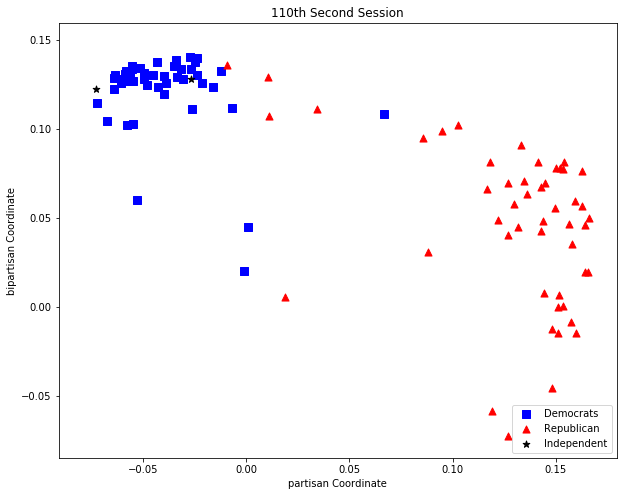

In [43]:
print("There are", D.shape[0], "Democrats")
print("There are", R.shape[0], "Republicans")
print("There is/are", I.shape[0], "Independents")
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
plt.xlabel('partisan Coordinate')
plt.ylabel('bipartisan Coordinate')
plt.title('110th Second Session')
ax1.scatter(D[:,0], D[:,1], s=50, c='b', marker="s", label='Democrats')
ax1.scatter(R[:,0], R[:,1], s=50, c='r', marker="^", label='Republican')
if(I.shape[0]!=0):
    ax1.scatter(I[:,0], I[:,1], s=50, c='k', marker="*", label='Independent')
plt.legend(loc='lower right');
plt.savefig('110th2.png')
plt.show()


# 113th Data Scrape (2013)
## First, we get the list of actual bills from the senate website
N=Number of Bills for Voting

In [44]:
#Get the Bills Voted On 110th
#Tell senate that Im a person, not Python
headers={}
headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'
#Session #1
url = 'https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_113_1.htm'
req = urlreq.Request(url, headers=headers)
resp = urlreq.urlopen(req)
respData = resp.read()
leader='https://www.senate.gov/l'
listoflinks=[]
data = re.findall(r'<tr(.*?)/tr>',str(respData))
for d in data:
    if("A bill" in d):
        l=re.findall(r'/l(.*?)>',str(d))
        listoflinks.append(leader+str(l)[2:-3])
#How many bills are we working with?
N=len(listoflinks)
print(N)

29


In [45]:
#Trick the Site
#Make my vector of Senator class objects
senators113th = []
nDem=0
nRep=0
nInd=0
#A=np.zeros((100,len(listoflinks)))
baseVote=listoflinks[0] #Get my base senators
req2 = urlreq.Request(baseVote, headers=headers) #Parse the first vote
resp2 = urlreq.urlopen(req2)
respData2 = resp2.read()
data2 = re.findall(r'<span(.*?)/span>',str(respData2))
data2 = data2[11][21:-9]
A=data2.split('/b')
A=A[0:-1]
voteNum=0
for a in A:
    if(a[0]==">"):
        a=a[15:-1]
    else:
        a=a[0:-1]
    d=a.split(' ')
    senators113th.append(sen.Senator(d[0],N,d[1][1]))
    if(d[1][1]=="D"):
        nDem+=1
    elif(d[1][1]=="R"):
        nRep+=1
    else:
        nInd+=1
    for s in senators113th:
        if(s.getName() == d[0]):
            s.setVotes(mySort(d[2][3:]),voteNum)
#Now that we've got the first ones(And the senator Names Loaded,
#Do the rest of the bills
listoflinks = listoflinks[1:]
voteNum+=1
for links in listoflinks:
    url2 = links
    req2 = urlreq.Request(url2, headers=headers) #Parse the first vote
    resp2 = urlreq.urlopen(req2)
    respData2 = resp2.read()
    data2 = re.findall(r'<span(.*?)/span>',str(respData2))
    data2 = data2[11][21:-9]
    A=data2.split('/b')
    A=A[0:-1]
    for a in A:
        if(a[0]==">"):
            a=a[15:-1]
        else:
            a=a[0:-1]
        d=a.split(' ')
        inList = False
        for s in senators113th:
            if(s.getName() == d[0]):
                s.setVotes(mySort(d[2][3:]),voteNum)
                inList = True
        if(not inList):
            senators113th.append(sen.Senator(d[0],N,d[1][1]))
            senators113th[-1].setVotes(mySort(d[2][3:]),voteNum)
            if(d[1][1]=="D"):
                nDem+=1
            elif(d[1][1]=="R"):
                nRep+=1
            else:
                nInd+=1
    voteNum+=1
Votes113th=[]
for s in senators113th:
    Votes113th.append(s.getVotes())
Votes113th=np.asarray(Votes113th)

In [46]:
U,s,V=np.linalg.svd(Votes113th, full_matrices=False)
D=[]
R=[]
I=[]
for i in range(0,U.shape[0]):
    if(senators113th[i].getParty()=="D"):
        f = np.asarray([-U[i,1],-U[i,0]])
        D.append(f)
    if(senators113th[i].getParty()=="R"):
        f = np.asarray([-U[i,1],-U[i,0]])
        R.append(f)
    if(senators113th[i].getParty()=="I"):
        f = np.asarray([-U[i,1],-U[i,0]])
        I.append(f)
D=np.asarray(D)
R=np.asarray(R)
I=np.asarray(I)

In [47]:
len(senators113th)

104

In [48]:
U.shape

(104, 29)

There are 56 Democrats
There are 46 Republicans
There is/are 2 Independents


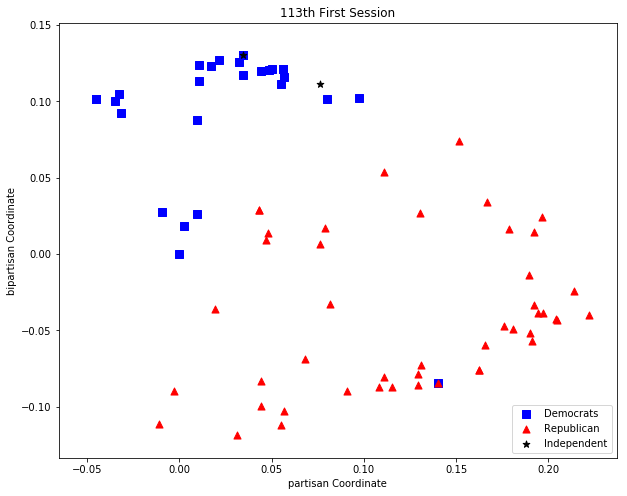

In [49]:
print("There are", D.shape[0], "Democrats")
print("There are", R.shape[0], "Republicans")
print("There is/are", I.shape[0], "Independents")
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
plt.xlabel('partisan Coordinate')
plt.ylabel('bipartisan Coordinate')
plt.title('113th First Session')
ax1.scatter(D[:,0], D[:,1], s=50, c='b', marker="s", label='Democrats')
ax1.scatter(R[:,0], R[:,1], s=50, c='r', marker="^", label='Republican')
if(I.shape[0]!=0):
    ax1.scatter(I[:,0], I[:,1], s=50, c='k', marker="*", label='Independent')
plt.legend(loc='lower right');
plt.savefig('113th1.png')
plt.show()


# Second Session 113th

In [50]:
#Get the Bills Voted On 107th
#Tell senate that Im a person, not Python
headers={}
headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'
#Session #1
url = 'https://www.senate.gov/legislative/LIS/roll_call_lists/vote_menu_113_2.htm'
req = urlreq.Request(url, headers=headers)
resp = urlreq.urlopen(req)
respData = resp.read()
leader='https://www.senate.gov/l'
listoflinks=[]
data = re.findall(r'<tr(.*?)/tr>',str(respData))
for d in data:
    if("A bill" in d):
        l=re.findall(r'/l(.*?)>',str(d))
        listoflinks.append(leader+str(l)[2:-3])
#How many bills are we working with?
N=len(listoflinks)
print(N)

45


In [51]:
#Trick the Site
#Make my vector of Senator class objects
senators113th = []
nDem=0
nRep=0
nInd=0
#A=np.zeros((100,len(listoflinks)))
baseVote=listoflinks[0] #Get my base senators
req2 = urlreq.Request(baseVote, headers=headers) #Parse the first vote
resp2 = urlreq.urlopen(req2)
respData2 = resp2.read()
data2 = re.findall(r'<span(.*?)/span>',str(respData2))
data2 = data2[11][21:-9]
A=data2.split('/b')
A=A[0:-1]
voteNum=0
for a in A:
    if(a[0]==">"):
        a=a[15:-1]
    else:
        a=a[0:-1]
    d=a.split(' ')
    senators113th.append(sen.Senator(d[0],N,d[1][1]))
    if(d[1][1]=="D"):
        nDem+=1
    elif(d[1][1]=="R"):
        nRep+=1
    else:
        nInd+=1
    for s in senators113th:
        if(s.getName() == d[0]):
            s.setVotes(mySort(d[2][3:]),voteNum)
#Now that we've got the first ones(And the senator Names Loaded,
#Do the rest of the bills
listoflinks = listoflinks[1:]
voteNum+=1
for links in listoflinks:
    url2 = links
    req2 = urlreq.Request(url2, headers=headers) #Parse the first vote
    resp2 = urlreq.urlopen(req2)
    respData2 = resp2.read()
    data2 = re.findall(r'<span(.*?)/span>',str(respData2))
    data2 = data2[11][21:-9]
    A=data2.split('/b')
    A=A[0:-1]
    for a in A:
        if(a[0]==">"):
            a=a[15:-1]
        else:
            a=a[0:-1]
        d=a.split(' ')
        inList = False
        for s in senators113th:
            if(s.getName() == d[0]):
                s.setVotes(mySort(d[2][3:]),voteNum)
                inList = True
        if(not inList):
            senators113th.append(sen.Senator(d[0],N,d[1][1]))
            senators113th[-1].setVotes(mySort(d[2][3:]),voteNum)
            if(d[1][1]=="D"):
                nDem+=1
            elif(d[1][1]=="R"):
                nRep+=1
            else:
                nInd+=1
    voteNum+=1
Votes113th=[]
for s in senators113th:
    Votes113th.append(s.getVotes())
Votes113th=np.asarray(Votes113th)

In [52]:
U,s,V=np.linalg.svd(Votes113th, full_matrices=False)
D=[]
R=[]
I=[]
for i in range(0,U.shape[0]):
    if(senators113th[i].getParty()=="D"):
        f = np.asarray([-U[i,1],-U[i,0]])
        D.append(f)
    if(senators113th[i].getParty()=="R"):
        f = np.asarray([-U[i,1],-U[i,0]])
        R.append(f)
    if(senators113th[i].getParty()=="I"):
        f = np.asarray([-U[i,1],-U[i,0]])
        I.append(f)
D=np.asarray(D)
R=np.asarray(R)
I=np.asarray(I)

In [53]:
len(senators113th)

101

In [54]:
U.shape

(101, 45)

There are 54 Democrats
There are 45 Republicans
There is/are 2 Independents


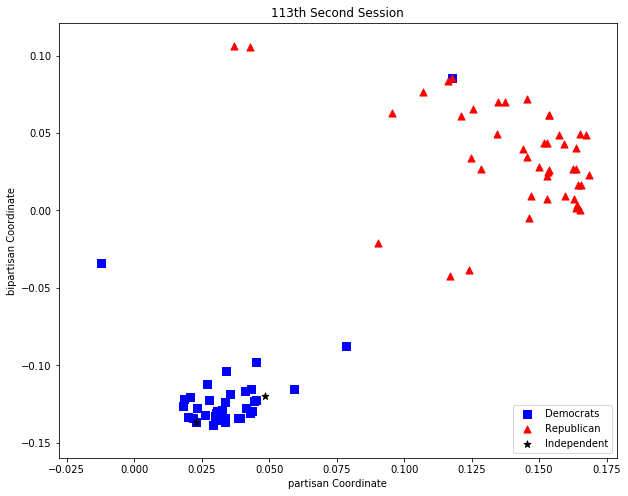

In [55]:
print("There are", D.shape[0], "Democrats")
print("There are", R.shape[0], "Republicans")
print("There is/are", I.shape[0], "Independents")
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
plt.xlabel('partisan Coordinate')
plt.ylabel('bipartisan Coordinate')
plt.title('113th Second Session')
ax1.scatter(D[:,0], D[:,1], s=50, c='b', marker="s", label='Democrats')
ax1.scatter(R[:,0], R[:,1], s=50, c='r', marker="^", label='Republican')
if(I.shape[0]!=0):
    ax1.scatter(I[:,0], I[:,1], s=50, c='k', marker="*", label='Independent')
plt.legend(loc='lower right');
plt.savefig('113th2.png')
plt.show()
